In [1]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns


%matplotlib inline

In [4]:
df=pd.read_excel("Data_Train.xlsx")

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## **Automated EDA**

In [6]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas_profiling as pf

In [8]:
 pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **Manual EDA**

In [9]:
df.shape

(10683, 11)

In [10]:
df.dtypes #checking the data types

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
df.isna().sum() #Checking null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
#Remove the NaN values from the dataset
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<br>
<br>

## **Feature Engineering**

Converting **Date_of_Journey** to its appropriate format as **datetime** with regards to **day** and **month**

In [13]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


<br>

### Date_of_journey

In [14]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month

In [15]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9


In [16]:
#we can now drop the Date_of_journey
df.drop(["Date_of_Journey"],axis=1,inplace=True)

<br>
Let's do the same for the other relative columns
<br>

## Dep_time

In [17]:
#covert to datetime
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [18]:
#we can now drop the 'Dep_Time'

df.drop(["Dep_Time"],axis=1,inplace=True)

<br>

## Arrival_time

In [19]:

df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [20]:
#we can now drop the 'Arrival_Time'

df.drop(["Arrival_Time"],axis=1,inplace=True)

<br>

## Duration Time

In [21]:
duration=df['Duration'].str.split(' ',expand=True) #split duration datapoints based on space ' '
duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
df['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in this case the 'm')

In [22]:
#we can now drop the 'Duration'

df.drop(["Duration"],axis=1,inplace=True)

In [23]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00


<br>

In [24]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

## Count of Airlines

In [25]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<br>

## Airline vs Price

/home/divakar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers Premium economy'),
  Text(3, 0, 'Multiple carriers'),
  Text(4, 0, 'Air India'),
  Text(5, 0, 'Vistara Premium economy'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'GoAir'),
  Text(8, 0, 'IndiGo'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'SpiceJet'),
  Text(11, 0, 'Trujet')])

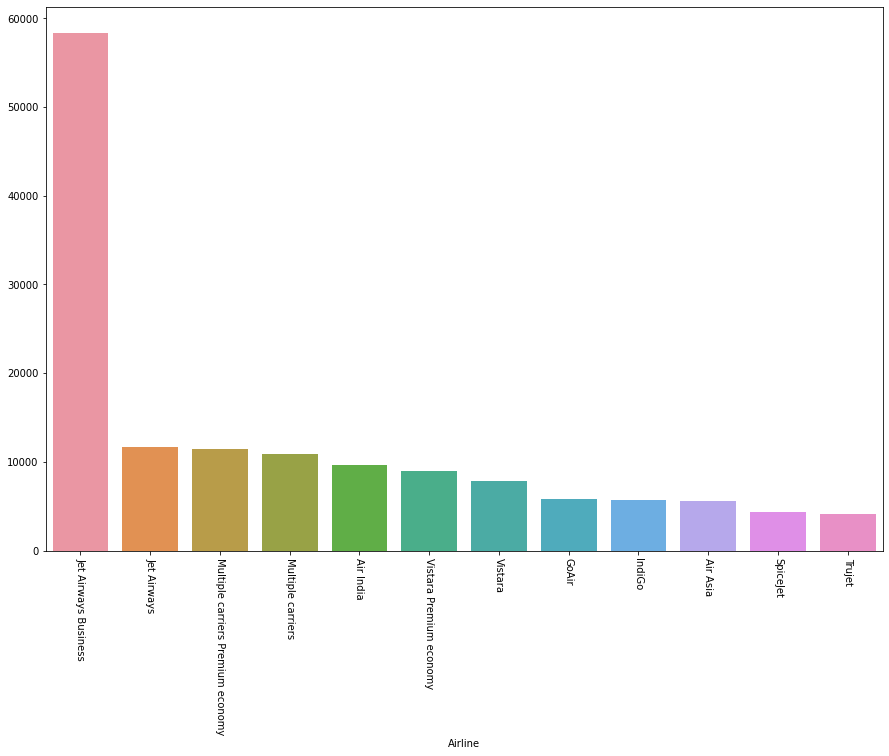

In [26]:
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=270)

**Jet Airways Business has the highest price with Trujet having the lowest**

<function matplotlib.pyplot.show(close=None, block=None)>

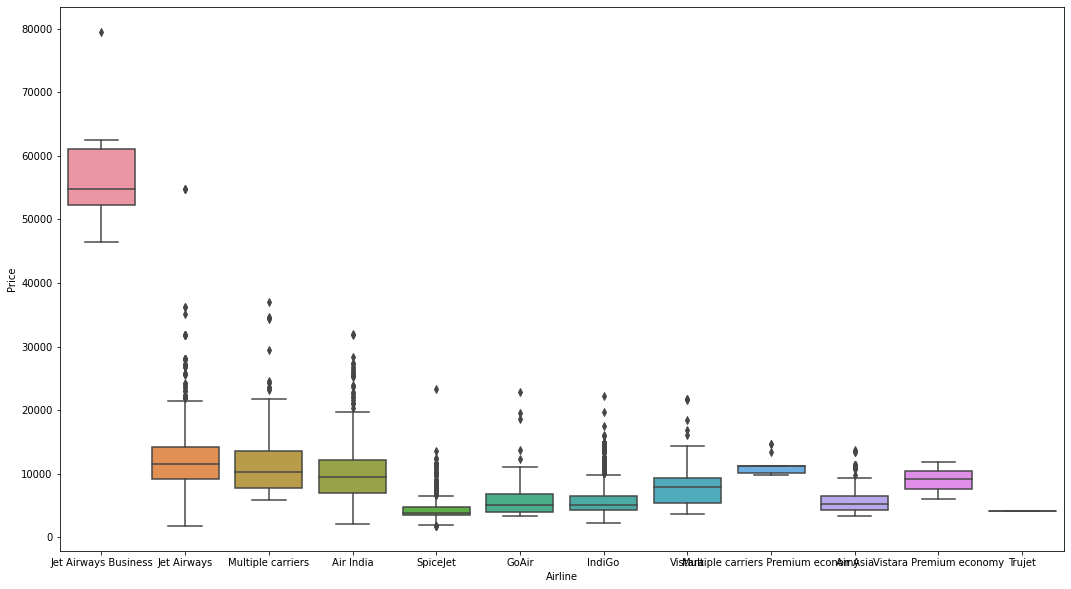

In [27]:
plt.figure(figsize=(18,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show

<br>

## Price based on number of stops

In [28]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

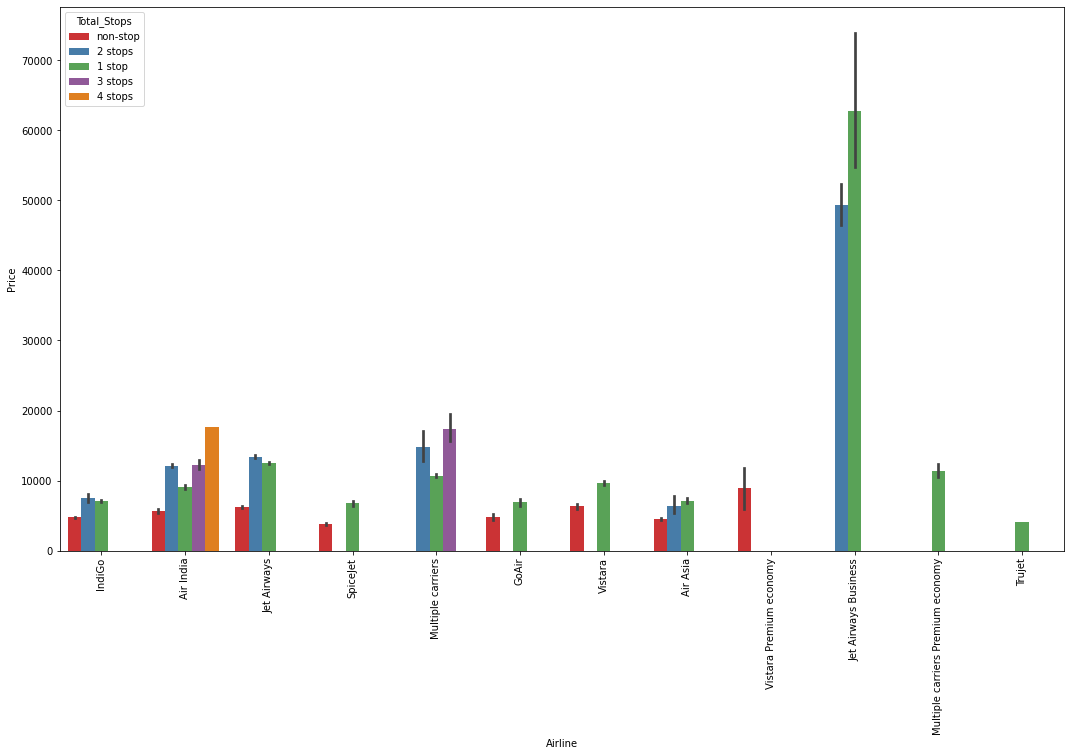

In [29]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

**One stop and two stpos Jet Airways Business is having the highest price**

<br>

In [30]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<br>

## Source vs Price

<function matplotlib.pyplot.show(close=None, block=None)>

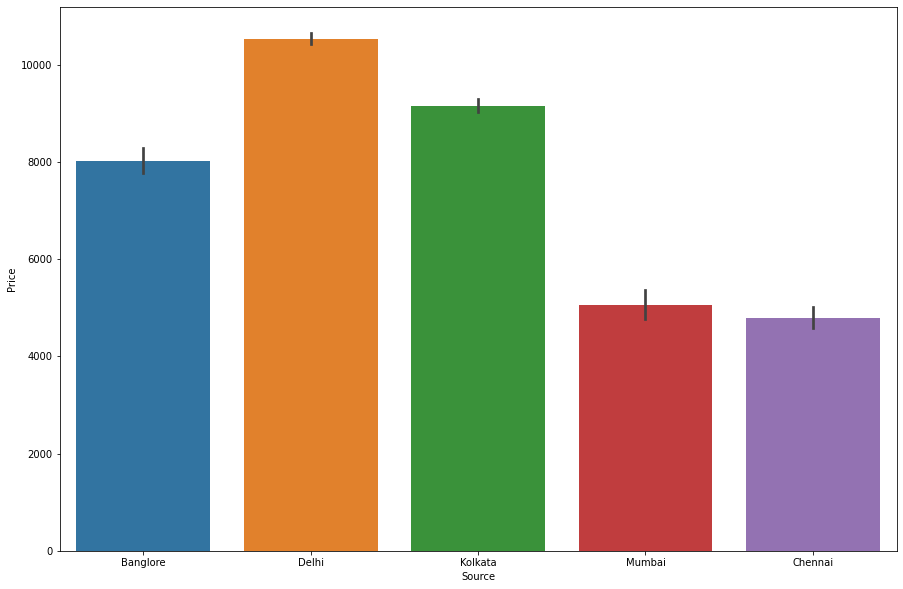

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show

<br>

## Destination vs Price

<function matplotlib.pyplot.show(close=None, block=None)>

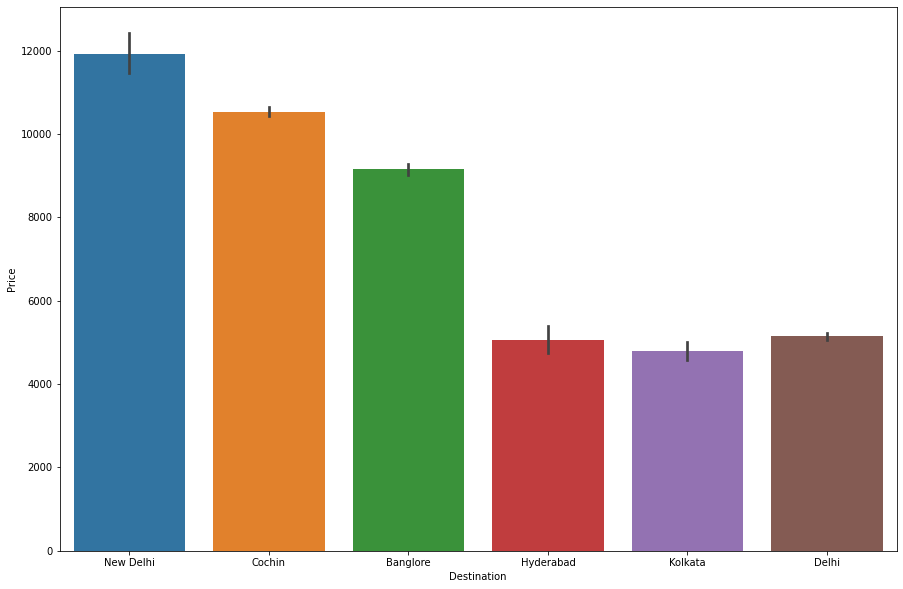

In [32]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

In [33]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [34]:
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [35]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

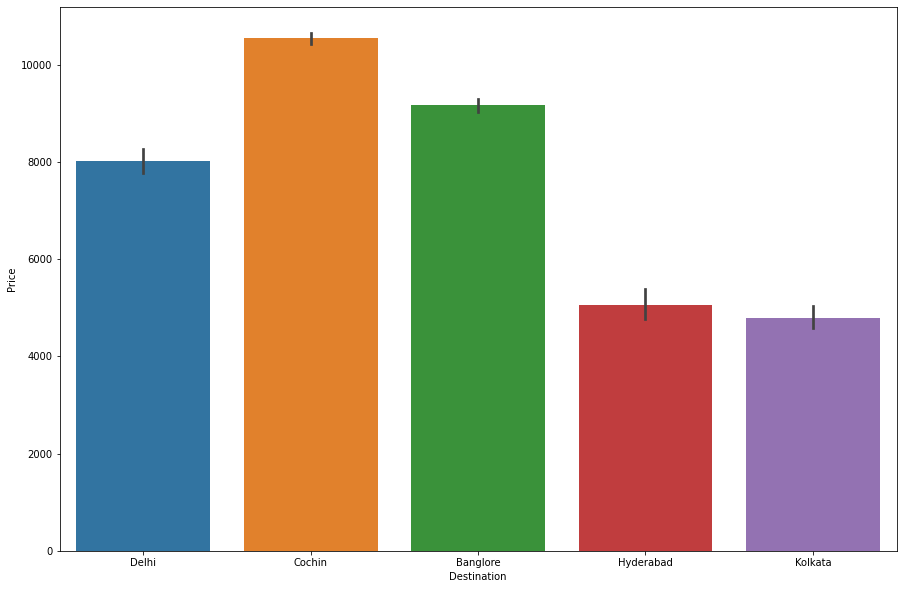

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

In [37]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:>

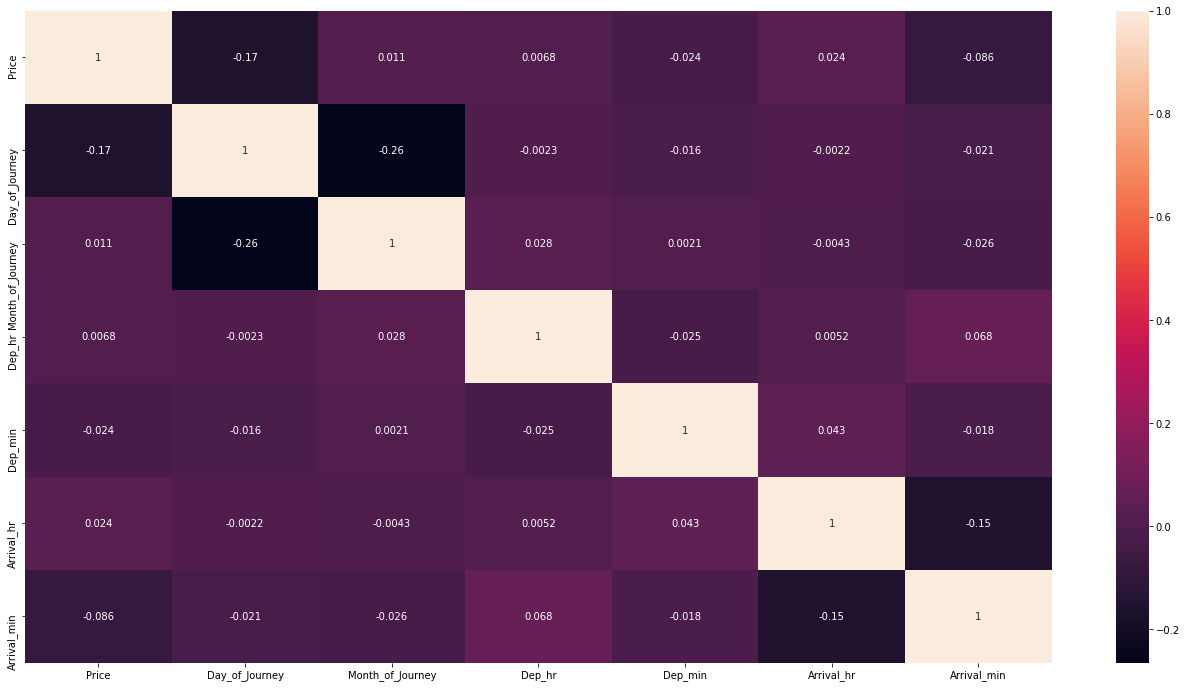

In [38]:
plt.figure(figsize=(23,12))
sns.heatmap(df.corr(),annot=True)

The features are less correlated which is a good thing for us to avoid **Multicollinearity**

In [39]:
#Handling Categorical Values 
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
# print(df['Source'].value_counts())
# print(df['Destination'].value_counts())

source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [40]:
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [41]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [42]:
df.shape

(10682, 31)

<br>
<br>
<br>
<br>

# **Test Data**

In [43]:
df_test=pd.read_excel("Test_set.xlsx")

In [44]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


<br>

### Let's Perform that same steps as we did for train data earlier

In [45]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)


In [46]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [47]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 28)


In [48]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [49]:
x=df.drop(['Route', 'Price','Additional_Info'],axis=1)
y=df['Price']

In [50]:
x.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,6,9,9,25,4,25,19,00


<br>
<br>

## **Model Building and Hyperparameter Tuning**

### ExtraTreesRegressor

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)

ExtraTreesRegressor()

**Future Importance**

<AxesSubplot:>

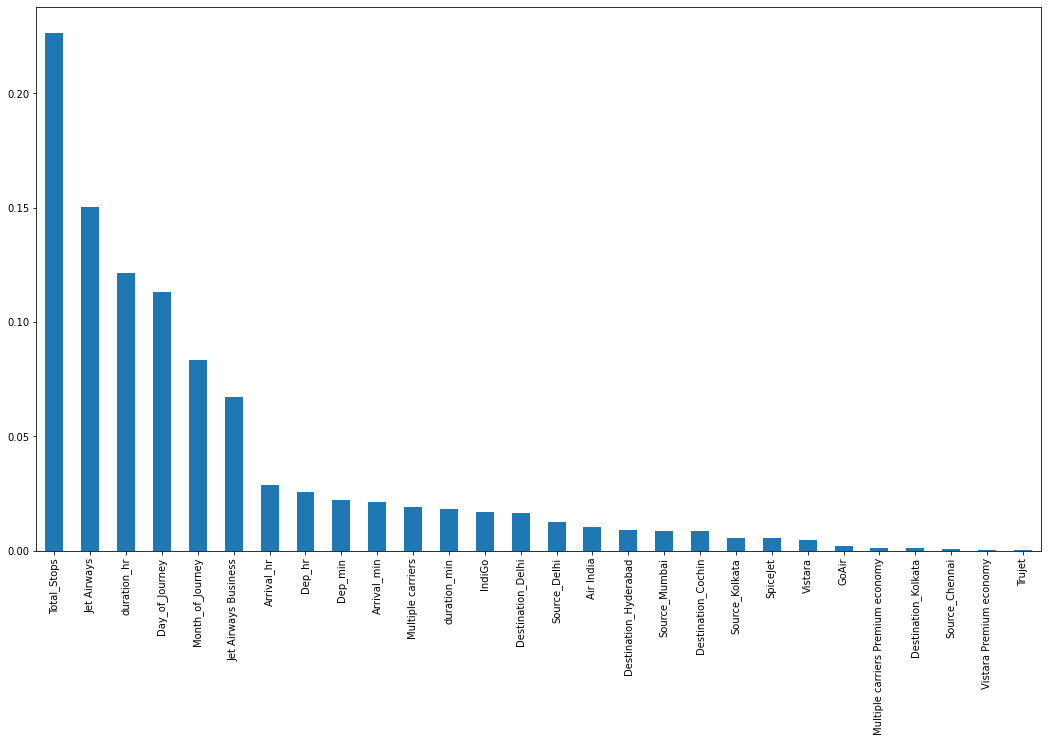

In [52]:
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

In [53]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [54]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)
y_predict=ET_Model.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7638020942187798

In [55]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.7940065089843905

<br>

**Hyperparameter**

In [56]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)

In [57]:
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [58]:
rf_pred=rCV.predict(X_test)
rf_pred

array([12459.7052027 ,  4286.19869543,  6132.08999849, ...,
       11680.77372766,  9716.8886983 ,  8664.63325891])

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1156.0311966160732
MSE 3954801.826666736


In [60]:
r2_score(y_test,rf_pred)

0.8073992237786757

In [61]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [62]:
from catboost import CatBoostRegressor

cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.05718
0:	learn: 4466.5316537	total: 158ms	remaining: 2m 38s
1:	learn: 4319.1952920	total: 164ms	remaining: 1m 22s
2:	learn: 4170.0874200	total: 170ms	remaining: 56.4s
3:	learn: 4033.1061207	total: 175ms	remaining: 43.6s
4:	learn: 3909.5332929	total: 181ms	remaining: 35.9s
5:	learn: 3788.8771850	total: 184ms	remaining: 30.5s
6:	learn: 3677.5795256	total: 187ms	remaining: 26.5s
7:	learn: 3585.9715553	total: 189ms	remaining: 23.5s
8:	learn: 3499.6424958	total: 192ms	remaining: 21.1s
9:	learn: 3408.9602975	total: 194ms	remaining: 19.2s
10:	learn: 3329.4018172	total: 196ms	remaining: 17.6s
11:	learn: 3258.4306577	total: 199ms	remaining: 16.4s
12:	learn: 3188.9732731	total: 201ms	remaining: 15.3s
13:	learn: 3126.6519374	total: 204ms	remaining: 14.3s
14:	learn: 3064.8092738	total: 206ms	remaining: 13.5s
15:	learn: 3011.9738031	total: 209ms	remaining: 12.8s
16:	learn: 2960.0953295	total: 211ms	remaining: 12.2s
17:	learn: 2917.5532184	total: 214ms	remaining: 11.7s
18:	lea

157:	learn: 1956.2192077	total: 546ms	remaining: 2.91s
158:	learn: 1953.8061817	total: 549ms	remaining: 2.9s
159:	learn: 1952.7697326	total: 551ms	remaining: 2.89s
160:	learn: 1951.1012882	total: 554ms	remaining: 2.88s
161:	learn: 1948.6492071	total: 556ms	remaining: 2.88s
162:	learn: 1945.1133182	total: 558ms	remaining: 2.87s
163:	learn: 1942.7228013	total: 561ms	remaining: 2.86s
164:	learn: 1940.9073624	total: 563ms	remaining: 2.85s
165:	learn: 1938.0460170	total: 566ms	remaining: 2.84s
166:	learn: 1935.3286398	total: 568ms	remaining: 2.83s
167:	learn: 1932.9545795	total: 570ms	remaining: 2.82s
168:	learn: 1931.6124443	total: 573ms	remaining: 2.82s
169:	learn: 1929.5307514	total: 575ms	remaining: 2.81s
170:	learn: 1927.4963218	total: 578ms	remaining: 2.8s
171:	learn: 1925.4669384	total: 580ms	remaining: 2.79s
172:	learn: 1924.3200339	total: 582ms	remaining: 2.78s
173:	learn: 1922.7154464	total: 585ms	remaining: 2.77s
174:	learn: 1920.9589969	total: 587ms	remaining: 2.77s
175:	learn: 

367:	learn: 1698.4934176	total: 1.12s	remaining: 1.92s
368:	learn: 1697.8317250	total: 1.12s	remaining: 1.92s
369:	learn: 1697.6146189	total: 1.13s	remaining: 1.92s
370:	learn: 1696.4908709	total: 1.13s	remaining: 1.91s
371:	learn: 1695.3707016	total: 1.13s	remaining: 1.91s
372:	learn: 1694.4249800	total: 1.13s	remaining: 1.91s
373:	learn: 1692.8636708	total: 1.14s	remaining: 1.9s
374:	learn: 1691.9105426	total: 1.14s	remaining: 1.9s
375:	learn: 1691.0001079	total: 1.14s	remaining: 1.9s
376:	learn: 1689.3539822	total: 1.15s	remaining: 1.89s
377:	learn: 1688.5976712	total: 1.15s	remaining: 1.89s
378:	learn: 1687.3608479	total: 1.15s	remaining: 1.89s
379:	learn: 1687.2498993	total: 1.15s	remaining: 1.88s
380:	learn: 1686.3166885	total: 1.16s	remaining: 1.88s
381:	learn: 1685.3745620	total: 1.16s	remaining: 1.88s
382:	learn: 1685.3653260	total: 1.16s	remaining: 1.87s
383:	learn: 1684.1481337	total: 1.17s	remaining: 1.87s
384:	learn: 1683.8657016	total: 1.17s	remaining: 1.87s
385:	learn: 1

519:	learn: 1593.0693129	total: 1.51s	remaining: 1.39s
520:	learn: 1592.2321611	total: 1.51s	remaining: 1.39s
521:	learn: 1591.2905653	total: 1.51s	remaining: 1.38s
522:	learn: 1590.4213259	total: 1.51s	remaining: 1.38s
523:	learn: 1590.3399523	total: 1.52s	remaining: 1.38s
524:	learn: 1589.7436960	total: 1.52s	remaining: 1.37s
525:	learn: 1589.1939304	total: 1.52s	remaining: 1.37s
526:	learn: 1588.8468717	total: 1.52s	remaining: 1.37s
527:	learn: 1588.8433189	total: 1.53s	remaining: 1.36s
528:	learn: 1588.2166192	total: 1.53s	remaining: 1.36s
529:	learn: 1587.6074543	total: 1.53s	remaining: 1.36s
530:	learn: 1586.5424952	total: 1.53s	remaining: 1.35s
531:	learn: 1586.5358638	total: 1.54s	remaining: 1.35s
532:	learn: 1585.6948721	total: 1.54s	remaining: 1.35s
533:	learn: 1585.2232425	total: 1.54s	remaining: 1.34s
534:	learn: 1584.6888646	total: 1.54s	remaining: 1.34s
535:	learn: 1583.5615763	total: 1.55s	remaining: 1.34s
536:	learn: 1582.6483115	total: 1.55s	remaining: 1.34s
537:	learn

732:	learn: 1481.4104156	total: 2.08s	remaining: 758ms
733:	learn: 1481.0754196	total: 2.08s	remaining: 756ms
734:	learn: 1480.6449104	total: 2.09s	remaining: 753ms
735:	learn: 1479.8553875	total: 2.09s	remaining: 750ms
736:	learn: 1479.6147841	total: 2.09s	remaining: 747ms
737:	learn: 1479.6097116	total: 2.1s	remaining: 744ms
738:	learn: 1479.2266130	total: 2.1s	remaining: 741ms
739:	learn: 1478.7468385	total: 2.1s	remaining: 739ms
740:	learn: 1478.2448187	total: 2.1s	remaining: 736ms
741:	learn: 1477.9312039	total: 2.11s	remaining: 733ms
742:	learn: 1477.3674445	total: 2.11s	remaining: 730ms
743:	learn: 1476.5042142	total: 2.11s	remaining: 727ms
744:	learn: 1476.0905853	total: 2.12s	remaining: 724ms
745:	learn: 1475.7560802	total: 2.12s	remaining: 721ms
746:	learn: 1475.5600092	total: 2.12s	remaining: 718ms
747:	learn: 1475.5550884	total: 2.12s	remaining: 715ms
748:	learn: 1475.2031736	total: 2.13s	remaining: 712ms
749:	learn: 1474.7343241	total: 2.13s	remaining: 710ms
750:	learn: 14

944:	learn: 1410.7058195	total: 2.66s	remaining: 155ms
945:	learn: 1410.2869816	total: 2.66s	remaining: 152ms
946:	learn: 1410.1688619	total: 2.66s	remaining: 149ms
947:	learn: 1409.9576388	total: 2.67s	remaining: 146ms
948:	learn: 1409.7019315	total: 2.67s	remaining: 143ms
949:	learn: 1409.5539003	total: 2.67s	remaining: 141ms
950:	learn: 1409.4242917	total: 2.67s	remaining: 138ms
951:	learn: 1409.1164346	total: 2.68s	remaining: 135ms
952:	learn: 1408.9998123	total: 2.68s	remaining: 132ms
953:	learn: 1408.9456486	total: 2.68s	remaining: 129ms
954:	learn: 1408.3353653	total: 2.69s	remaining: 127ms
955:	learn: 1407.9314986	total: 2.69s	remaining: 124ms
956:	learn: 1407.6987672	total: 2.69s	remaining: 121ms
957:	learn: 1407.4323027	total: 2.69s	remaining: 118ms
958:	learn: 1406.9693403	total: 2.69s	remaining: 115ms
959:	learn: 1406.6843112	total: 2.7s	remaining: 112ms
960:	learn: 1406.4428982	total: 2.7s	remaining: 110ms
961:	learn: 1405.9767107	total: 2.7s	remaining: 107ms
962:	learn: 1

In [63]:
cat_pred=cat.predict(X_test)

In [64]:
r2_score(y_test,cat_pred)

0.8301928561140887

In [65]:
pip install lightgbm

     |████████████████████████████████| 2.0 MB 6.2 MB/s eta 0:00:01     |██████████████████████▋         | 1.4 MB 6.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [66]:
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [67]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

LGBMRegressor()

In [68]:
lgb_pred=lgb_model.predict(X_test)
r2_score(y_test,lgb_pred)

0.8030064936005559

In [69]:
pip install xgboost

     |████████████████████████████████| 166.7 MB 4.8 kB/s  eta 0:00:01     |███████████████████████████     | 140.4 MB 37.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [70]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
r2_score(y_test,xgb_pred)

0.8212496825906317

In [71]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [72]:
# #Use pickle to save our model so that we can use it later

# import pickle 
# # Saving model to disk
# pickle.dump(CAT_Model, open('model.pkl','wb'))
# model=pickle.load(open('model.pkl','rb'))

In [73]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [74]:
deploy_df=df.drop(['Route','Additional_Info'],axis=1)

In [75]:
deploy_df.to_csv('deploy_df')